In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch

from torch.autograd import Variable
from torch.utils.data import DataLoader

import os

from PIL import Image
from CNN_model import CNN
from load_data import DatasetFromHdf5
from utils import ts_to_np,np_to_ts,batch_psnr

In [2]:
batchSize=20
image_size=32

Testing the trained model

In [3]:
#Load testing data
test_set = DatasetFromHdf5("./dataset/test_mnist.h5")
testing_data_loader = DataLoader(dataset=test_set,batch_size=batchSize, shuffle=True)

#obtain the data and label in the testing set
real = next(iter(testing_data_loader))  # real[0]image,real[1]label
data,target=real[0],real[1]

#change the type of data and label from tensor to numpy
data_np=ts_to_np(data)
target_np=ts_to_np(target)

device=torch.device('cuda:0')

#obtain model
model = CNN().to(device)
model_info = torch.load("./model_dir/CNN_200.pth")
model.load_state_dict(model_info)
model.eval()

#put the testing data into the trained model and obtain the recovered image by using CNN
with torch.no_grad():
    
    DGI_img=Variable(data.cuda())
  
    out = model(DGI_img)

#change the recovered image by using CNN from tensor to numpy
out_np=ts_to_np(out)

#calculate the average PSNR of these images
psnr=batch_psnr(out_np,target_np)
print('PSNR of testing images:',psnr)

D:\pengyang\pytorch\DLGI\DNN\load_data.py:8: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  hf = h5py.File(file_path)


PSNR of testing images: 23.6186482037928


Change the angle of the image

In [4]:
for i in range(batchSize):
    data_out=data_np[i]
    data_out=data_out.swapaxes(0, 1)
    data_np[i]=data_out
    
for i in range(batchSize):
    data_out=target_np[i]
    data_out=data_out.swapaxes(0, 1)
    target_np[i]=data_out
    
for i in range(batchSize):
    data_out=out_np[i]
    data_out=data_out.swapaxes(0, 1)
    out_np[i]=data_out

Plot the result

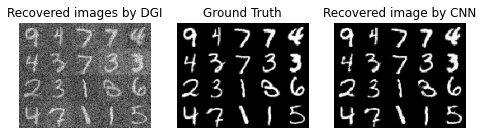

In [5]:
# Plot the result

plt.figure(4,figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Recovered images by DGI")
plt.imshow((data_np.reshape(4, 5,image_size,image_size).swapaxes(1,2).reshape(image_size*4, image_size*5)),cmap='gray')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("Ground Truth")
plt.imshow((target_np.reshape(4, 5,image_size,image_size).swapaxes(1,2).reshape(image_size*4, image_size*5)),cmap='gray')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("Recovered image by CNN")
plt.imshow((out_np.reshape(4, 5,image_size,image_size).swapaxes(1,2).reshape(image_size*4, image_size*5)),cmap='gray')

plt.savefig('./figures/' + 'result.jpg', bbox_inches='tight')
plt.show()